**Setting up the data paths**

In [1]:
test_path='/kaggle/input/tmdb-box-office-prediction/test.csv'
train_path='/kaggle/input/tmdb-box-office-prediction/train.csv'
import pandas as pd
train_data=pd.read_csv(train_path)

Forming the Random Forest Regressor Model

In [2]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(random_state=1)

Reading the test data

In [3]:
test_data=pd.read_csv(test_path)

Let us take a look at the train data

In [4]:
train_data.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


train_data.describe()

In [5]:
test_data.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482242,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


In [6]:
print("train.shape ",train_data.shape)
print("test.shape ",test_data.shape)

train.shape  (3000, 23)
test.shape  (4398, 22)


In [7]:
test_data.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew'],
      dtype='object')

In [8]:
train_data.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [9]:
test_data.describe()

,id,budget,popularity,runtime
count,4398.000000,4.398000e+03,4398.000000,4394.000000
mean,5199.500000,2.264929e+07,8.550230,107.622212
std,1269.737571,3.689991e+07,12.209014,21.058290
min,3001.000000,0.000000e+00,0.000001,0.000000
25%,4100.250000,0.000000e+00,3.895186,94.000000
50%,5199.500000,7.450000e+06,7.482242,104.000000
75%,6298.750000,2.800000e+07,10.938524,118.000000
max,7398.000000,2.600000e+08,547.488298,320.000000


In [10]:
train_data.runtime.unique()

array([ 93., 113., 105., 122., 118.,  83.,  92.,  84., 100.,  91., 119.,
        98., 145.,  97.,  85., 111.,  96.,  87., 130.,  95., 116., 110.,
        89., 112., 117., 106., 125.,  94., 127.,  90., 123., 126., 108.,
        88., 167., 102., 160., 107., 144., 124., 115., 133., 129., 104.,
       103., 157., 109., 135., 147.,  72., 158., 120., 121., 177., 189.,
       178.,  86.,  79., 176., 101.,  99.,  74., 141.,  65., 136., 143.,
       132.,  53., 139., 114., 140., 156., 148., 137., 168., 154.,  77.,
        76., 163.,   0., 155.,  82., 150., 149., 170.,  80., 152., 128.,
       131., 220., 181., 179., 180.,  81., 161., 162., 134., 193.,  71.,
       188., 212., 142., 146., 151., 171.,  75.,  40., 165.,  78., 185.,
       138., 153.,  60., 175., 338., 219.,  nan, 183.,  73., 186., 199.,
        68., 214., 248., 159., 207., 187., 197., 164., 169., 172.,  66.,
        63., 213.,  62.,  11., 174.,  69., 191., 182.])

In [11]:
train_data.original_language.unique()

array(['en', 'hi', 'ko', 'sr', 'fr', 'it', 'nl', 'zh', 'es', 'cs', 'ta',
       'cn', 'ru', 'tr', 'ja', 'fa', 'sv', 'de', 'te', 'pt', 'mr', 'da',
       'fi', 'el', 'ur', 'he', 'no', 'ar', 'nb', 'ro', 'vi', 'pl', 'hu',
       'ml', 'bn', 'id'], dtype=object)

Importing Label Encoder

In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train_data['original_language']=le.fit_transform(train_data['original_language'])
test_data['original_language']=le.fit_transform(test_data['original_language'])
train_data['runtime']=le.fit_transform(train_data['runtime'])
test_data['runtime']=le.fit_transform(test_data['runtime'])

Filling N/A Values in runtime

In [13]:
train_data.revenue.mode()

0     6000000
1    11000000
dtype: int64

In [14]:
train_data['runtime'].fillna(6000000, inplace=True)

In [15]:
train_data.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     0
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [16]:
train_data.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     0
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

Setting up the variables, which are to be used for fitting  

Predictor Variable

In [17]:
y=train_data.revenue

Features

In [18]:
X=train_data[['budget','original_language','popularity','runtime']]

Importing the mean absolute error metric

In [19]:
from sklearn.metrics import mean_absolute_error

Fitting the model

In [20]:
model.fit(X,y)

RandomForestRegressor(random_state=1)

Prediction using train data

In [21]:
predictions=model.predict(X)

Let us check the error

In [22]:
print(mean_absolute_error(y, predictions))

16033411.905046666


Prediction using test data

In [23]:
test_id=test_data["id"]
test_id.shape
test_X=test_data[['budget','original_language','popularity','runtime']]
predictions=model.predict(test_X)

In [24]:
submission = pd.DataFrame({'id': test_id, 'revenue':predictions})
submission = submission[['id', 'revenue']]
submission.head()
submission.to_csv("submission.csv", index=False)

In [25]:
import matplotlib.pyplot as plt

In [26]:
bar_data = {'Actual Revenue':y.mean(), 'Expected Revenue Predicted Using RFR':predictions.mean()}

In [27]:
bar_one = list(bar_data.keys())
bar_two = list(bar_data.values())

In [28]:
fig = plt.figure(figsize = (10, 5))

<Figure size 720x360 with 0 Axes>

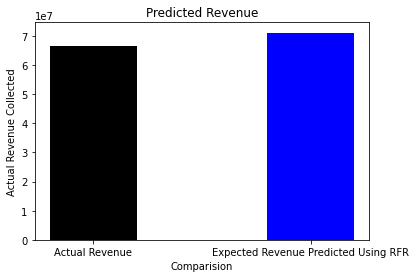

In [29]:
plt.bar(bar_one, bar_two, color =['black','blue'],
        width = 0.4)
 
plt.xlabel("Comparision")
plt.ylabel("Actual Revenue Collected")
plt.title("Predicted Revenue")
plt.show()

In [52]:
from pandas.plotting import scatter_matrix

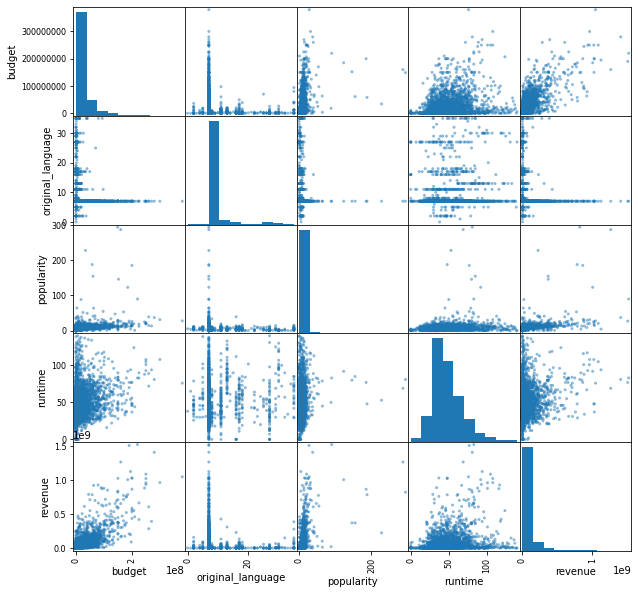

In [57]:
scatter_matrix(train_data.drop("id", axis = 1), figsize=(10, 10))
plt.show()

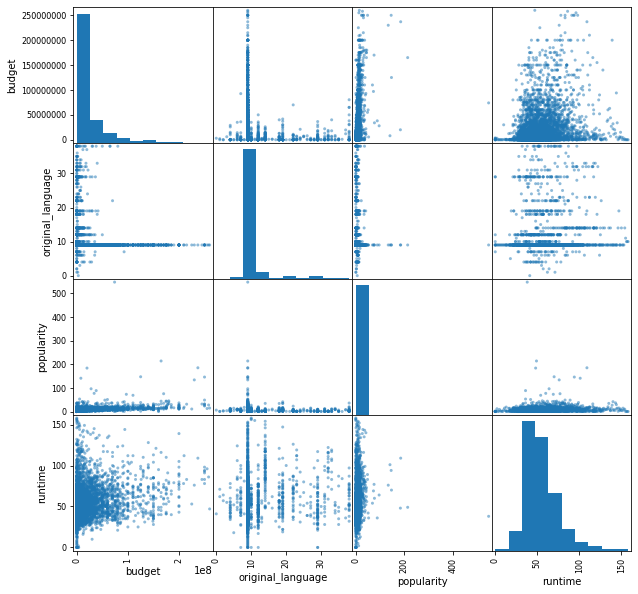

In [58]:
scatter_matrix(test_data.drop("id", axis = 1), figsize=(10, 10))
plt.show()

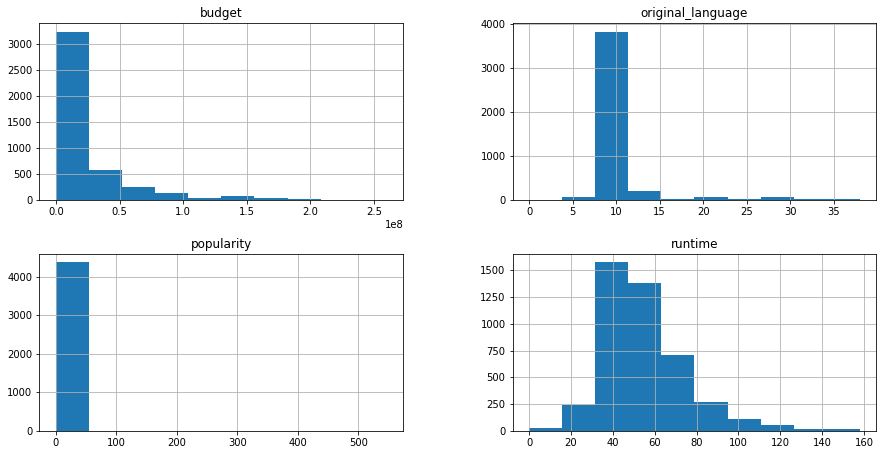

In [60]:
test_data.drop("id", axis = 1).hist(figsize=(15,7.5))
plt.show()

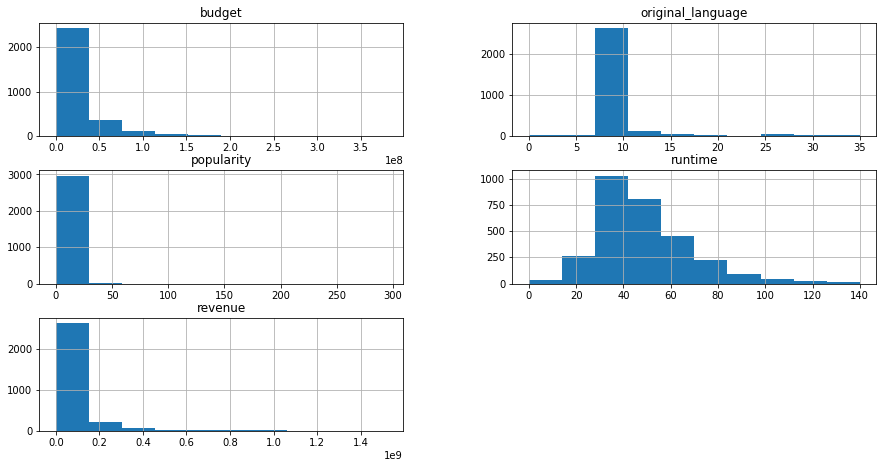

In [61]:
train_data.drop("id", axis = 1).hist(figsize=(15,7.5))
plt.show()

In [62]:
import seaborn as sns

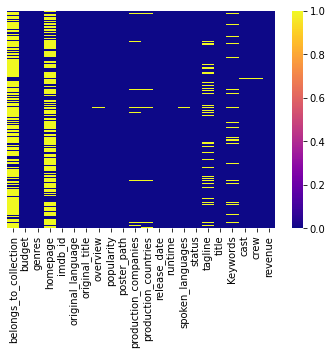

In [65]:
sns.heatmap(train_data.drop("id", axis = 1).isnull(), yticklabels = False, cmap = "plasma")
plt.show()

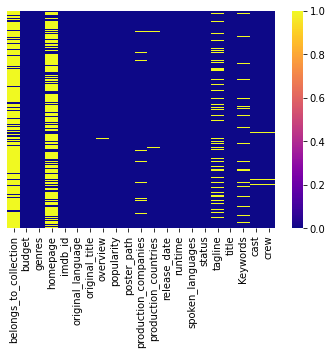

In [64]:
sns.heatmap(test_data.drop("id", axis = 1).isnull(), yticklabels = False, cmap = "plasma")
plt.show()

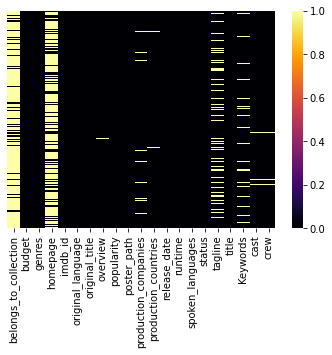

In [66]:
sns.heatmap(test_data.drop("id", axis = 1).isnull(), yticklabels = False, cmap = "inferno")
plt.show()